/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


[10.66185201]
[[0.92033997]]


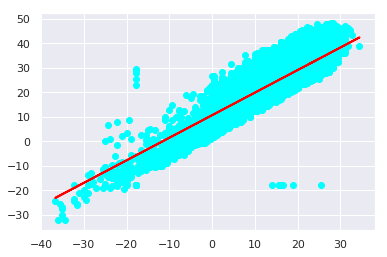

Mean absolute error 3.19932917837853
Mean square error 17.631568097568447
Root mean square error 4.198996082109204


In [2]:
import numpy as np
import pandas as pd
import seaborn as sbs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.metrics import accuracy_score
sbs.set()

dataset=pd.read_csv('Weather.csv')
dataset.shape

'''
dataset.plot(x='MinTemp',y='MaxTemp',style='o')
plt.title("Graph B/w MinTemp and MaxTemp")
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

#calculate the average tempareture(25,35)
plt.figure(figsize=(15,10))
plt.tight_layout()
sbs.distplot(dataset['MaxTemp'])
'''

x=dataset['MinTemp'].values.reshape(-1,1)
y=dataset['MaxTemp'].values.reshape(-1,1)
#split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

#fit the dataset

regression=LinearRegression()
#training the algorithm
regression.fit(x_train,y_train)

#check the value of intercept and slope
print(regression.intercept_)
print(regression.coef_)
#calculate the predication
y_pred=regression.predict(x_test)

#compare the actual value to predict value
df=pd.DataFrame({'Actual':y_test.flatten(),'predict':y_pred.flatten()})
'''
df1=df.head(25)
df1.plot(kind='bar',figsize=(16,10))
#plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
#plt.grid(which='minor',linestyle=':',linwidth='0,5',color='blue')
plt.show()
'''

#plot our straight line with the test data 
plt.scatter(x_test,y_test,color='cyan')
plt.plot(x_test,y_pred,color='red',linewidth=2)
plt.show()

#calculate the error
print("Mean absolute error",metrics.mean_absolute_error(y_test,y_pred))
print("Mean square error",metrics.mean_squared_error(y_test,y_pred))
print("Root mean square error",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
